<img src="./images/Logo1.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="700 px" align="center">

# 第二章　量子回路を構成する

ここでは、基本的なゲートで量子回路を構成する方法について述べる。

最初に確認したいのは、ゲート型の量子コンピュータで、量子コンピュータをプログラムするということは、基本的なゲートで量子回路を構成することである。量子アルゴリズムは、基本的には、量子ゲートからなる回路図で表現される。（以下、本ハンズオンでは、特に断りがない限り、「量子コンピュータ」という言葉を、「ゲート型の量子コンピュータ」の意味で用いている）

我々が日常的に利用しているコンピュータでは、ハードウェアとソフトウェアの階層が分離していて、「コンピュータ・プログラミング」といえば、もっぱら、ソフトウェアのプログラミングを意味するのとは大きく異なっている。現時点では、量子プログラミングとは、ハードウェアのプログラミングと考えていい。それは、FPGAでの「プログラミング」と似ている。

こうした現状は、量子コンピュータとその上でのプログラミング技法が、歴史的には、まだ誕生期にあることを意味している。


**本章の内容**　　　　　[全体目次](./Contents.ipynb)

- [基本的なゲートと回路の構成法について](#gates_basics)

- [基本的なゲート一つからなる回路を構成する](#one_gates_basics)

- [ゲートをSerialにつなげて回路を構成する](#serial_gates)

- [ゲートをParallelに並べて回路を構成する](#parallel_gates)

- [コントロール・ゲート回路を構成する](#control_gates)

- [ゲートをSerial, Parallelに並べて回路を構成する](#serial_parallel_gates)

- [演習問題](#exercises)



## 基本的なゲートと回路の構成法について <a id='gates_basics'></a>

#### 基本的なゲートには、次のようなものがある。それぞれのゲートの働きについては、次章で述べる。


|ゲート名　|プログラム上の名前 |ゲートの記号|
|:--|:--:|:--:|
| Xゲート | 'x' |<img src="./images/circuit/X.jpg"  width="100 px" align="center">|
|Yゲート | 'y' |<img src="./images/circuit/Y.png"  width="100 px" align="center">|
|Zゲート | 'z' |<img src="./images/circuit/Z.png"  width="100 px" align="center">|
|Hゲート | 'h' |<img src="./images/circuit/H.png"  width="100 px" align="center">|
|CNOTゲート | 'cx' |<img src="./images/circuit/CNOT.png"  width="100 px" align="center">|
|Sゲート|'s'|<img src="./images/circuit/S.png"  width="100 px" align="center">|
|Tゲート|'t'|<img src="./images/circuit/T.png"  width="100 px" align="center">|

#### これらのゲートから回路を構成する方法は、基本的には、次の三つである。

1. #### Serialな構成　あるゲートの出力を次のゲートの入力にserialに接続する
1. #### Parallelな構成　あるゲートと別のゲートをparallelに構成する
1. #### コントロールの構成 あるゲートの出力を、parallelに走る別のゲートのコントロールに使用する



## 基本的なゲート一つからなる回路を構成する <a id='one_gates_basics'></a>


### 基本的な量子ゲート $X$ 一つからなる回路を構成する

**コードのインポート**

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute

<div class="alert alert-block alert-info">

### 回路構成の準備
    
#### 最初のプログラムに必要な要素は、QuantumRegisterとQuantumCircuit である。

- **QuantumRegister** は、量子ビット(これを**qubit**と呼ぶ)に対応し、通常は、水平方向に左から右に走る。最初に適用されるゲートが、回路の一番左に来る
- QuantumRegister qは、一つ一つのqubitに対応したレジスターの配列で、それぞれのqubitのレジスターは、q[0], q[1], q[2], ... で参照され、そのインデックスは、通常は、垂直方向に上から下に向かう。
- n個のqubitからなるシステムは、n個のレジスターを持つQuantumRegister上に定義される。

- **QuantumCircuit**は、QuantumRegisterとそれに作用する回路の全体である。
</div>


In [2]:
# 1 qubitの量子レジスターを生成する
q = QuantumRegister(1, 'q')

# q レジスターに作用する量子回路を生成する
circ = QuantumCircuit(q)

<div class="alert alert-block alert-info">

### ゲートの追加

いったん、レジスターを持つ回路を生成すると、レジスターを操作するゲート（演算）を追加することができる。

**ゲートは回路に、追加順に左から右に一つづつ追加される。**
</div>


In [3]:
# qubit 0 に X ゲートを追加する。
circ.x(q[0])

<div class="alert alert-block alert-info">

### 回路図を描く

`QuantumCircuit.draw()`は、回路図を描画する。

いくつかのオプションがある。
- `circ.draw()` は、テキスト形式でcirc 回路の回路図を出力する
- `circ.draw(output='mpl')`は、Matplotを使ってcirc 回路の回路図を出力する
- `circ.draw(output='latex')`は、PDF形式でcirc 回路の回路図を出力する

</div>

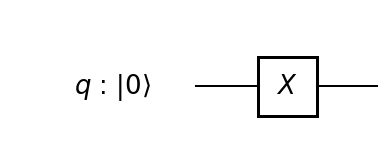

In [4]:
# テキスト形式で描画する
#circ.draw()

# Matplotlib で描画する
circ.draw(output='mpl')

# LaTex で描画する
#circ.draw(output='latex')


### 基本的な量子ゲート $Z$ 一つからなる回路を構成する


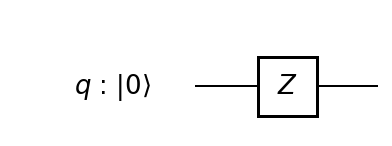

In [5]:
# 1 qubitの量子レジスターを生成する
q = QuantumRegister(1, 'q')

# q レジスターに作用する量子回路を生成する
circ = QuantumCircuit(q)

# qubit 0 に Z ゲートを追加する。
circ.z(q[0])

# Matplotlib で描画する
circ.draw(output='mpl')


### 基本的な量子ゲート $H$ 一つからなる回路を構成する


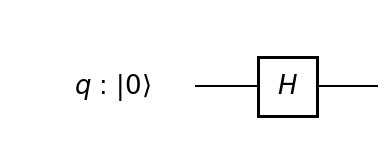

In [6]:
# 1 qubitの量子レジスターを生成する
q = QuantumRegister(1, 'q')

# q レジスターに作用する量子回路を生成する
circ = QuantumCircuit(q)

# qubit 0 に H ゲートを追加する。
circ.h(q[0])

# Matplotlib で描画する
circ.draw(output='mpl')


## ゲートをSerialにつなげて回路を構成する <a id='serial_gates'></a>


### 量子ゲート $H$ を二つSerialにつなげて回路を構成する

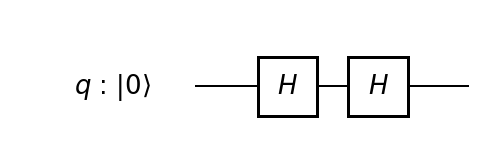

In [7]:
# 1 qubitの量子レジスターを生成する
q = QuantumRegister(1, 'q')

# q レジスターに作用する量子回路を生成する
circ = QuantumCircuit(q)

# qubit 0 に H ゲートを追加する。
circ.h(q[0])
# qubit 0 に さらに、H ゲートを追加する。
circ.h(q[0])

# Matplotlib で描画する
circ.draw(output='mpl')

### 量子ゲート $Z$ と $X$ を二つSerialにつなげて回路を構成する

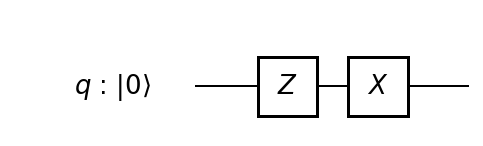

In [8]:
# 1 qubitの量子レジスターを生成する
q = QuantumRegister(1, 'q')

# q レジスターに作用する量子回路を生成する
circ = QuantumCircuit(q)

# qubit 0 に Z ゲートを追加する。
circ.z(q[0])
# qubit 0 に X ゲートを追加する。
circ.x(q[0])

# Matplotlib で描画する
circ.draw(output='mpl')

### 量子ゲート $Z$ と $S$ と $T$ を三つSerialにつなげて回路を構成する

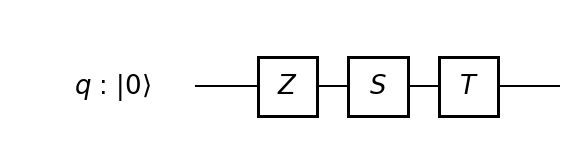

In [9]:
# 1 qubitの量子レジスターを生成する
q = QuantumRegister(1, 'q')

# q レジスターに作用する量子回路を生成する
circ = QuantumCircuit(q)

# qubit 0 に Z ゲートを追加する。
circ.z(q[0])
# qubit 0 に S ゲートを追加する。
circ.s(q[0])
# qubit 0 に T ゲートを追加する。
circ.t(q[0])

# Matplotlib で描画する
circ.draw(output='mpl')


## ゲートをParallelに並べて回路を構成する <a id='parallel_gates'></a>


### 量子ゲート $X$ を二つParallelに並べて回路を構成する

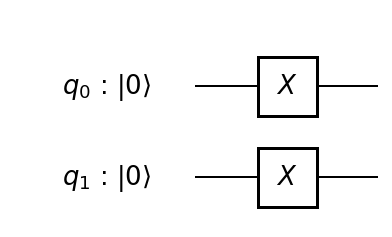

In [10]:
# 2 qubitの量子レジスターを生成する
q = QuantumRegister(2, 'q')

# q レジスターに作用する量子回路を生成する
circ = QuantumCircuit(q)

# qubit 0 に X ゲートを追加する。
circ.x(q[0])
# qubit 1に X ゲートを追加する。
circ.x(q[1])

# Matplotlib で描画する
circ.draw(output='mpl')

<div class="alert alert-block alert-info">

この回路図では、qubit 0に対応するレジスターq[0]がトップに、qubit 1に対応するレジスターq[1]がその下に描かれる。

この回路は、左から右に読まれる。すなわち、最初に適用されるゲートが左側に置かれる。
</div>

### 量子ゲート $H$ を二つParallelに並べて回路を構成する

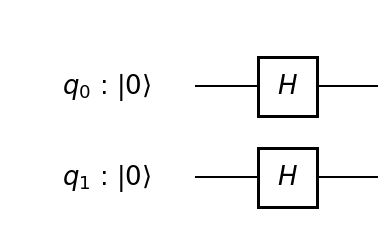

In [11]:
# 2 qubitの量子レジスターを生成する
q = QuantumRegister(2, 'q')

# q レジスターに作用する量子回路を生成する
circ = QuantumCircuit(q)

# qubit 0 に H ゲートを追加する。
circ.h(q[0])
# qubit 1に H ゲートを追加する。
circ.h(q[1])

# Matplotlib で描画する
circ.draw(output='mpl')

### 量子ゲート $H$ を三つParallelに並べて回路を構成する

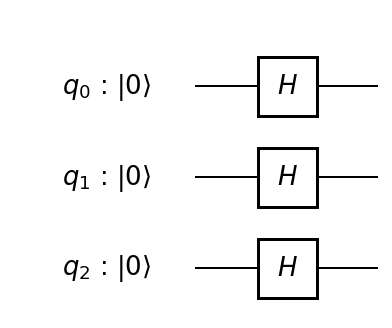

In [12]:
# 3 qubitの量子レジスターを生成する
q = QuantumRegister(3, 'q')

# q レジスターに作用する量子回路を生成する
circ = QuantumCircuit(q)

# qubit 0 に H ゲートを追加する。
circ.h(q[0])
# qubit 1に H ゲートを追加する。
circ.h(q[1])
# qubit 1に H ゲートを追加する。
circ.h(q[2])

# Matplotlib で描画する
circ.draw(output='mpl')


## コントロール・ゲート回路を構成する <a id='control_gates'></a>


### CNOT 回路を構成する

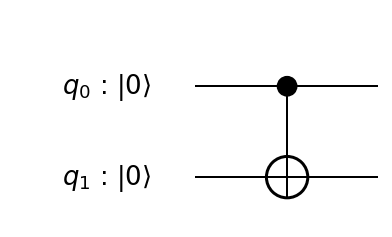

In [13]:
# 2 qubitの量子レジスターを生成する
q = QuantumRegister(2, 'q')

# q レジスターに作用する量子回路を生成する
circ = QuantumCircuit(q)

# qubit 1に CNOTゲート(コントロールX)を追加する。
circ.cx(q[0], q[1])

# Matplotlib で描画する
circ.draw(output='mpl')

### コントロール $H$ 回路を構成する

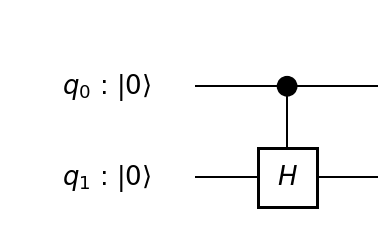

In [14]:
# 2 qubitの量子レジスターを生成する
q = QuantumRegister(2, 'q')

# q レジスターに作用する量子回路を生成する
circ = QuantumCircuit(q)

# qubit 1に コントロール Z追加する。
circ.ch(q[0], q[1])

# Matplotlib で描画する
circ.draw(output='mpl')

### 二つのCNOT からなる回路を構成する

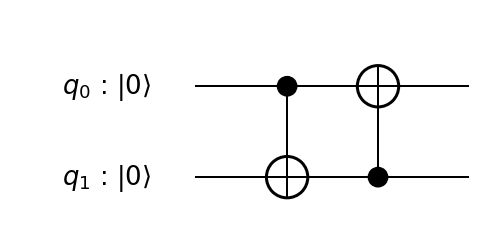

In [15]:
# 2 qubitの量子レジスターを生成する
q = QuantumRegister(2, 'q')

# q レジスターに作用する量子回路を生成する
circ = QuantumCircuit(q)

# qubit 1に CNOTゲート(コントロールX)を追加する。
circ.cx(q[0], q[1])
# qubit 0に CNOTゲート(コントロールX)を追加する。
circ.cx(q[1], q[0])

# Matplotlib で描画する
circ.draw(output='mpl')


## ゲートをSerial, Parallelに並べて回路を構成する <a id='serial_parallel_gates'></a>


### CNOTゲート |01> を構成する

<div class="alert alert-block alert-info">

- #### 量子回路の各レジスターの入力値はデフォールトで $|0\rangle$ に定まっている。
- #### 意外に思うかもしれないが、任意の入力値を量子回路に与えることは、必ずしも容易ではない。
- #### ただし、入力の値を$|0\rangle$ から$|1\rangle$ に変えることは簡単にできる。qubitを反転させ、$|0\rangle$ を$|1\rangle$に変える Xゲートを、レジスターの先頭に挿入すれば良い。 
</div>

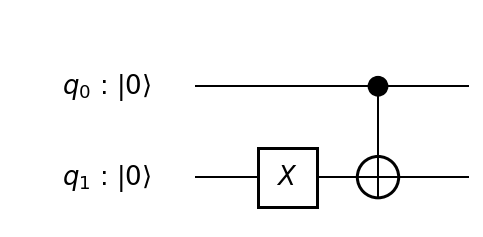

In [16]:
# 2 qubitの量子レジスターを生成する
q = QuantumRegister(2, 'q')

# q レジスターに作用する量子回路を生成する
cnot01 = QuantumCircuit(q)

# qubit 1 にX ゲートを追加する
cnot01.x(q[1])
# qubit 1 に CNOTゲートを追加する。
cnot01.cx(q[0],q[1])

cnot01.draw(output='mpl')

### CNOTゲート |10> を構成する

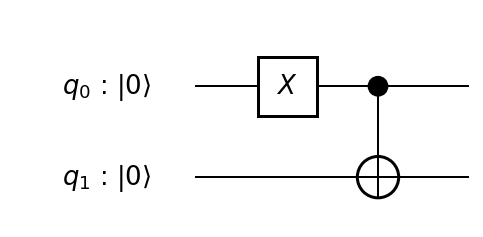

In [17]:
# 2 qubitの量子レジスターを生成する
q = QuantumRegister(2, 'q')

# q レジスターに作用する量子回路を生成する
cnot10 = QuantumCircuit(q)

# qubit ０ にX ゲートを追加する
cnot10.x(q[0])
# qubit 1 に CNOTゲートを追加する。
cnot10.cx(q[0],q[1])

#drawing the circuit
cnot10.draw(output='mpl')

## 演習問題　<a id='exercises'></a>

### 1. 次の回路図を構成せよ

<img src="./images/circuit/BellStateGate.png"  width="300 px" align="center">

### 2. 次の回路図を構成せよ

<img src="./images/circuit/BSG11.png"  width="350 px" align="center">

### 3. 次の回路図を構成せよ

<img src="./images/circuit/GHZGate.png"  width="350 px" align="center">


### 　　　　　　　　[前の章へ](./1_basic.ipynb)　[全体目次](./Contents.ipynb)　 [次の章へ](./3_simulation.ipynb)